# Regression task

Predicting a continuous value based on input data.

In [7]:
import numpy as np #matrix operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split #split the dataset to train and test
from sklearn.preprocessing import MinMaxScaler #scaling the data (bring to data in one range)
import matplotlib.pyplot as plt #for plot

In [8]:
# read the csv file using pandas libraries
df=pd.read_csv("Admission_Predict.csv")
df.head() #show 1st five row

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [3]:
#changing names because previous names are little bit confusing
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})
#we donot need serial number so its good to drop it because its just a number
df=df.drop("Serial No.",axis=1)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
X=np.asarray(df.drop("Admission_Chance",axis=1)) # exclude target variable in X
Y=np.asarray(df["Admission_Chance"]) #put traget variable in Y

In [6]:
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [8]:
Y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [9]:
# create train data for training and test data for testing the model
X_train, X_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=0)

# scale the data to bring in a specific range
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Model -1

Build a first artificial neural network (ANN) model with four hidden layers. The hidden layers should have 128, 64, 32, and 16 neurons respectively, all using the ReLU activation function. The output layer should use a linear activation function since it is a regression problem.

In [4]:
# libraries for build ANN Model
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# define base model
def baseline_model():
    # create model
    model = Sequential() 
    model.add(Dense(128, input_dim=7, activation='relu')) #once assign input dimensions 
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='tanh'))
    
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the model
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [12]:
# train your 1st ANN Model with 100 Epoch and batch-size = 32
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/100
13/13 [==============================] - 1s 21ms/step - loss: 0.2106 - val_loss: 0.0288
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0297 - val_loss: 0.0156
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0093 - val_loss: 0.0071
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0097
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0045 - val_loss: 0.0084
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0079
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0077
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 0.0071
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0072
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - val_loss: 0.0077
Epoch 11

In [13]:
print("🎉 Hurray! You've completed your first ANN training! 🎉")

🎉 Hurray! You've completed your first ANN training! 🎉


### Now time for testing

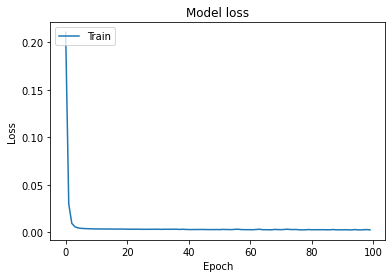

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Performance

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
# predict the test data
prediction = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, prediction) 
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.007334177744153224
Root Mean Squared Error (RMSE): 0.08563981401283649
Mean Absolute Error (MAE): 0.0650648251891136
R-squared (R2): 0.5800582462300792


In [22]:
print("Task done-zo! Now, let's tackle Q1 - the next stop on our data science rollercoaster! 🎢")

Task done-zo! Now, let's tackle Q1 - the next stop on our data science rollercoaster! 🎢


### Q1. As here Apply for Adam you should apply other optimiser such as SGD, RMSProp, Adadelta, Adagrad and Compare the perfromance of each optimisers.

https://keras.io/api/optimizers/

## Model -2

Build another artificial neural network (ANN) model with five hidden layers. The hidden layers should have 256, 128, 64, 32, and 16 neurons respectively, all using the ReLU activation function with l2 regularization, dropout and Batch normalization. The output layer should use a linear activation function since it is a regression problem.

In [23]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [24]:
# Define the model with L2 regularization, dropout, and batch normalization
def baseline_model2():
    # Create model
    model = Sequential()
    model.add(Dense(256, input_dim=7, activation='relu', kernel_regularizer=l2(0.01)))  # Input layer with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 1 with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 2 with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 3 with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(16, activation='tanh', kernel_regularizer=l2(0.01)))  # Hidden layer 4 with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='linear'))  # Output layer

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the model
model2 = baseline_model2()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2048      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [25]:
history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/100
13/13 [==============================] - 4s 47ms/step - loss: 7.7545 - val_loss: 3.6621
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 6.5667 - val_loss: 3.5219
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 6.4837 - val_loss: 3.4102
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 5.9226 - val_loss: 3.3172
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 5.5708 - val_loss: 3.2546
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 5.0794 - val_loss: 3.1957
Epoch 7/100
13/13 [==============================] - 0s 10ms/step - loss: 5.1461 - val_loss: 3.1363
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 4.8943 - val_loss: 3.0996
Epoch 9/100
13/13 [==============================] - 0s 11ms/step - loss: 4.7429 - val_loss: 3.0584
Epoch 10/100
13/13 [==============================] - 0s 18ms/step - loss: 4.5202 - val_loss: 3.0194

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
prediction = model2.predict(X_test)

In [28]:
# Calculate regression metrics
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.0070317002568784405
Root Mean Squared Error (RMSE): 0.08385523392656204
Mean Absolute Error (MAE): 0.06972641990184783
R-squared (R2): 0.5973775601209041


### Q2. Here also apply other optimiser such as SGD, RMSProp,Adadelta, Adagrad and Compare the perfromance of each optimisers.

In [30]:
print("Hooray! You've mastered training and testing ANNs for regression! 🎉 Now, onto classification! Is it gonna be a breeze or a wild rollercoaster? Let's dive in and find out! 🎢")

Hooray! You've mastered training and testing ANNs for regression! 🎉 Now, onto classification! Is it gonna be a breeze or a wild rollercoaster? Let's dive in and find out! 🎢


# Classificatoion Task

Predicting a discrete category or class label based on input data.

Build artificial neural network (ANN) model with four hidden layers. The hidden layers should have 128, 64, 32, and 16 neurons respectively, all using the ReLU activation function. The output layer should use a softmax activation function since it is a classification problem.

### What is MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a large collection of handwritten digits that is used to train image processing systems and machine learning models. The dataset is made up of two subsets: 60,000 images for training and 10,000 images for testing. Each image is a 28x28 pixel grayscale image with a value ranging from 0 to 255, where 0 is black and 255 is white. The images are also labeled with the corresponding numeral, which allows the dataset to be used in supervised learning to train classifiers. 


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [33]:
# print shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

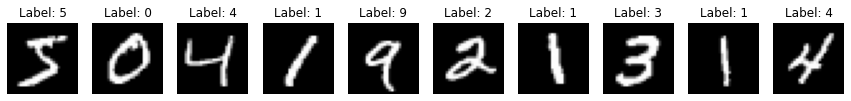

In [34]:
# Function to plot some images from the dataset
def plot_samples(x, y, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

# Plot some samples from the training set
plot_samples(x_train, y_train, num_samples=10)

In [58]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [35]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [37]:
# Build the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 10)                170       
                                                                 
Total params: 111,514
Trainable params: 111,514
Non-tr

In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5771 - accuracy: 0.8390 - val_loss: 0.2352 - val_accuracy: 0.9336
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2020 - accuracy: 0.9422 - val_loss: 0.1677 - val_accuracy: 0.9524
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1377 - accuracy: 0.9599 - val_loss: 0.1403 - val_accuracy: 0.9588
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1039 - accuracy: 0.9697 - val_loss: 0.1206 - val_accuracy: 0.9647
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.1212 - val_accuracy: 0.9646
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0656 - accuracy: 0.9803 - val_loss: 0.1123 - val_accuracy: 0.9688
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.1255 - val_accuracy:

In [41]:
print("Boom! You've leveled up! Now you're not just training ANNs for regression, you're diving into classification with image data!")

Boom! You've leveled up! Now you're not just training ANNs for regression, you're diving into classification with image data!


## Performance

In [42]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score

In [43]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1191 - accuracy: 0.9754
Test accuracy: 0.9753999710083008


In [44]:
# Predict the classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.95      0.96       892
           6       0.98      0.97      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [45]:
print("Precision_Score: ",precision_score(y_test, y_pred_classes,average='weighted'))
print("Recall_Score: ",recall_score(y_test, y_pred_classes,average='weighted'))
print("F1_Score: ",f1_score(y_test, y_pred_classes,average='weighted'))

Precision_Score:  0.9755009107977514
Recall_Score:  0.9754
F1_Score:  0.9753868402498244


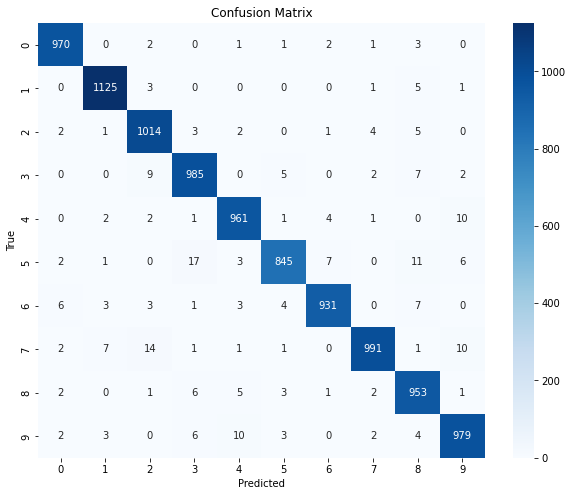

In [46]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Prediction

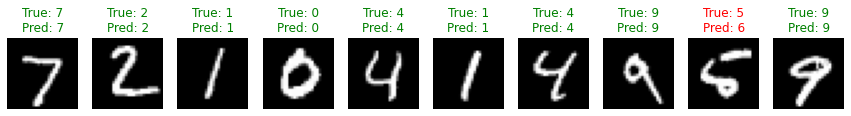

In [47]:
# Function to plot some images from the dataset along with their predictions
def plot_samples_with_predictions(x, y_true, y_pred, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}", color='green' if y_true[i] == y_pred[i] else 'red')
        plt.axis('off')
    plt.show()

# Plot some samples from the test set with actual and predicted labels
plot_samples_with_predictions(x_test, y_test, y_pred_classes, num_samples=10)

In [48]:
print("Uh-oh! Task 2 is waving at you! Time to give it a high-five and keep the fun rolling! 🖐️😄")

Uh-oh! Task 2 is waving at you! Time to give it a high-five and keep the fun rolling! 🖐️😄


## Task Model 2

### Do it Yourself !!!!

In [74]:
# Build the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='relu'),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

#### Update the model to include 5 hidden layers with 256, 128, 64, 32, and 16 neurons respectively. Incorporate regularization techniques like L2 regularization, dropout, or batch normalization. Experiment with various optimizers such as SGD or RMSprop and observe their impact on model performance with a batch size of 64.

### ANS

In [52]:
# Define the model with L2 regularization, dropout, and batch normalization
def baseline_model2():
    # Create model

    model = Sequential()
    
    model.add(Flatten(input_shape=(28, 28)))  # Flatten layer for input data
    model.add(Dense(256, input_dim=7, activation='relu', kernel_regularizer=l2(0.01)))  # Input layer with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 1 with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 2 with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer 3 with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(16, activation='tanh', kernel_regularizer=l2(0.01)))  # Hidden layer 4 with L2 regularization
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='linear'))  # Output layer

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the model
model2 = baseline_model2()
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_20 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_21 (Bat  (None, 128)              512       
 chNormalization)                                     

In [55]:
# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# Train the model
history = model2.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)